# Exploratory Data Analysis

---
## Task Summary
The data were provided by DrivenData.org through their challenge ['Warm Up: Machine Learning With a Heart'](https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/). As stated on the challenge page:

Your goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

- 0 represents no heart disease present
- 1 represents heart disease present


---
## Notebook Purpose

The purpose of this notebook is to look at the data provided by DrivenData.org and get a feel for:
- what exists (or doesn't exist) in the data
- what type of cleaning is required
- what types of transformations need to be performed (one-hot, min/max scaling, etc)
- evaluate which types of models should be explored

---
## import modules and load the data

In [1]:
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
os.chdir('../data')
DATA_DIR = os.getcwd()

In [6]:
df_x = pd.read_csv(DATA_DIR + '/raw/train_values.csv')
df_y = pd.read_csv(DATA_DIR + '/raw/train_labels.csv')
df_x_test = pd.read_csv(DATA_DIR + '/raw/test_values.csv')

In [7]:
df_x.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [9]:
df_y.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


---
## Check for NaNs

In [10]:
df_x.isnull().any()

patient_id                              False
slope_of_peak_exercise_st_segment       False
thal                                    False
resting_blood_pressure                  False
chest_pain_type                         False
num_major_vessels                       False
fasting_blood_sugar_gt_120_mg_per_dl    False
resting_ekg_results                     False
serum_cholesterol_mg_per_dl             False
oldpeak_eq_st_depression                False
sex                                     False
age                                     False
max_heart_rate_achieved                 False
exercise_induced_angina                 False
dtype: bool

Good, none of the data are missing but there might still be issues to resolve.

---
## Set dtype to match DrivenData

In [11]:
bool_cols = ['sex', 'fasting_blood_sugar_gt_120_mg_per_dl', 'exercise_induced_angina']
float_cols = ['oldpeak_eq_st_depression']
categorical_cols = ['thal']
int_cols = ['slope_of_peak_exercise_st_segment', 'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'age', 'max_heart_rate_achieved']

In [12]:
df_x[bool_cols].astype(bool)
df_x[float_cols].astype(float)
df_x[categorical_cols].astype('category')
df_x[int_cols].astype(int)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


## Examine the distributions of the numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3206f1048>,
      dtype=object)

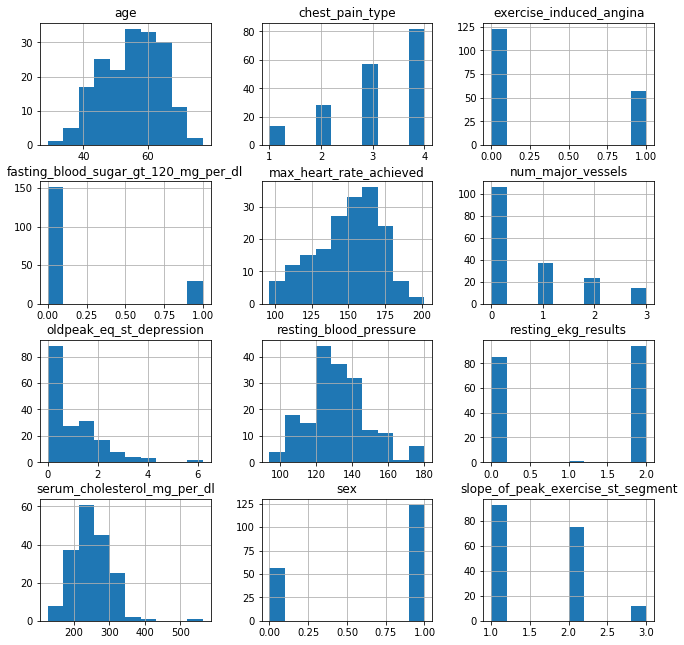

In [19]:
df_x[[*int_cols, *float_cols, *bool_cols]].hist(figsize=[11,11])

## Types of data
- Continuous
  - age
  - max_heart_rate_achieved
  - oldpeak_eq_st_depression
  - resting_blood_pressure
  - serum_cholesterol_mg_per_dl
- Nominal
  - slope_peak_exercise_st_segment
- Dichotomous
  - exercise_induced_angina
  - fasting_blood_sugar_gt_120_mg_per_dl
  - resting_ekg_results
  - sex
- Ordinal
  - num_major_vessels
  - chest_pain_type
- Categorical
  - thal

## Examine correlations

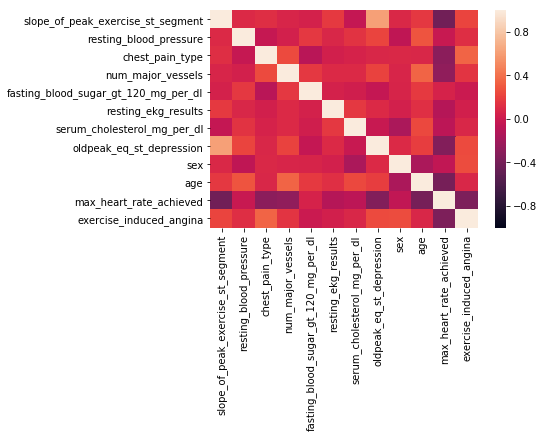

In [16]:
corr = df_x.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            vmin=-1.0,
            vmax=1.0)

## How to handle the data types
For categorical and nominal data, use one-hot encoding to create dummy variables. These are the columns that should be one-hot encoded:
- slope_peak_exercise_st_segment (ordinal)
- num_major_vessels (ordinal)
- chest_pain_type (ordinal)
- thal (categorical)
- exercise_induced_angina
- fasting_blood_sugar_gt_120_mg_per_dl
- resting_ekg_results

(array([ 2.,  6., 15., 45., 50., 46., 13.,  2.,  0.,  1.]),
 array([2.10037055, 2.1654614 , 2.23055226, 2.29564311, 2.36073397,
        2.42582482, 2.49091568, 2.55600654, 2.62109739, 2.68618825,
        2.7512791 ]),
 <a list of 10 Patch objects>)

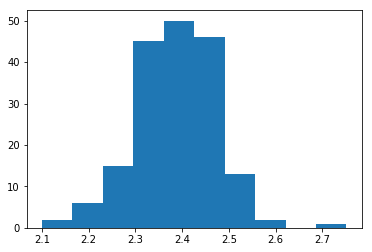

In [22]:
plt.hist(np.log10(df_x['serum_cholesterol_mg_per_dl'].values))